# ЦМ Рабинер

In [3]:
import numpy as np
import random

In [4]:
def rabiner(sequence, matrices, pi, states):    
    for i in range(len(matrices)):
        matrix = matrices[i]
        alpha = [pi]
        for state in sequence[1:]:
            vector = [0] * len(states)
            for j in range(len(states)):
                if state:
                    vector[states.index(state)] += alpha[-1][j] * matrix[j][states.index(state)]
                else:
                    for s in states:
                        vector[states.index(s)] += alpha[-1][j] * matrix[j][states.index(s)]
            alpha.append(vector)
        print('\n', 'P[', i+1, ']:')    
        print('\n', np.array(alpha))
        result = sum(alpha[-1])  
        print('\nP = ', result, '\n')
        # P - вероятность того, что данная последовательность сгенерирована на основе seq

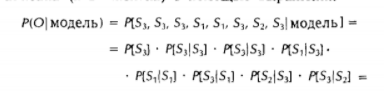

In [5]:
# инициализация 
m, n = 4, 4
matrix_type = 4

Возможные виды матриц:
1. Квадратная матрица
2. Диагональная матрица – квадратная матрица, все элементы которой равны нулю кроме элементов, стоящих на главной диагонали
3. Единичная матрица – диагональная матрица, диагональные элементы которой равны 1.
4. где одна единица в строке, остальные - нули
5. Квадратная матрица, сумма элементов строки которой равна 1

In [6]:
if (matrix_type == 1):
    P1 = np.random.rand(n,n)
    print(P1)
if (matrix_type == 2):
    P2 = np.zeros((n, n))
    for i in range(m):
        P2[i][i] = random.randint(0, 100)
    print(P2)
if (matrix_type == 3):
    P3 = np.random.choice([1],n)
    mat3 = np.diag(P3)
    print(mat3)
if (matrix_type == 4):
    P4 = np.zeros((m, n))
    for i in range(m):
        x = np.random.randint(0, n-1)
        P4[i][x] = 1
    print(P4)
if (matrix_type == 5):
    P5 = np.random.rand(m,n)
    P5/P5.sum(axis=1)[:,None]
    print(P5)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [33]:
# P11 = [[1/3, 1/3, 1/3], 
#       [0, 0.5, 0.5], 
#       [0.5, 0, 0.5]]

# P22 = [[0, 1, 0],
#      [0, 0, 1],
#      [1, 0, 0]]

In [34]:
# states - множество состояний ЦМ
states = ['s1', 's2', 's3']

In [35]:
seq1 = ['s1', 's3', 's2', 's1']
seq2 = ['s1', 's2', 's3', 's1']
seq3 = ['s1', 's3', 's1', 's3']

seq4 = ['s1', 's3', 's3', 's1']
seq5 = ['s1', None, 's3', None]
seq6 = [None, 's2', 's3', None]

seq7 = [None, 's2', 's2', 's1']
seq8 = [None, None, 's2', 's1']

In [36]:
# seq -  множество допустимых реализаций цепи Маркова (последовательность наблюдений)
seq = [seq1, seq2, seq3, seq4, seq5]
# pi - начальный вектор, состоит из вероятностей начальных состояний
pi = [1/3, 0, 0]

In [37]:
for i in range(len(seq)):
    print('------------------------------------')
    print('i =', i)
    rabiner(seq[i], [P1, P2], pi, states)

------------------------------------
i = 0

 P[ 1 ]:

 [[0.33333333 0.         0.        ]
 [0.         0.         0.24439566]
 [0.         0.05864717 0.        ]
 [0.04592353 0.         0.        ]]

P =  0.0459235318337987 


 P[ 2 ]:

 [[0.33333333 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]

P =  0.0 

------------------------------------
i = 1

 P[ 1 ]:

 [[0.33333333 0.         0.        ]
 [0.         0.18789059 0.        ]
 [0.         0.         0.01205983]
 [0.00853531 0.         0.        ]]

P =  0.008535312929791119 


 P[ 2 ]:

 [[0.33333333 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]

P =  0.0 

------------------------------------
i = 2

 P[ 1 ]:

 [[0.33333333 0.         0.        ]
 [0.         0.         0.24439566]
 [0.17297036 0.         0.        ]
 [0.         0.         0.12681962]]

P =  

In [38]:
seq = [seq7, seq8]
pi = [1/3, 1/3, 1/3]

In [39]:
for i in range(len(seq)):
    print('------------------------------------')
    print('i =', i)
    print('------------------------------------\n')
    rabiner(seq[i], [P1, P2], pi, states)

------------------------------------
i = 0
------------------------------------


 P[ 1 ]:

 [[0.33333333 0.33333333 0.33333333]
 [0.         0.4385019  0.        ]
 [0.         0.22445412 0.        ]
 [0.17575827 0.         0.        ]]

P =  0.17575827491548954 


 P[ 2 ]:

 [[ 0.33333333  0.33333333  0.33333333]
 [ 0.          5.          0.        ]
 [ 0.         75.          0.        ]
 [ 0.          0.          0.        ]]

P =  0.0 

------------------------------------
i = 1
------------------------------------


 P[ 1 ]:

 [[0.33333333 0.33333333 0.33333333]
 [0.644859   0.4385019  0.53260402]
 [0.         0.71575093 0.        ]
 [0.56046709 0.         0.        ]]

P =  0.5604670889790699 


 P[ 2 ]:

 [[ 0.33333333  0.33333333  0.33333333]
 [ 3.          5.          3.        ]
 [ 0.         75.          0.        ]
 [ 0.          0.          0.        ]]

P =  0.0 

